In [1]:
import sys, os
import math
import numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2
import matplotlib.pyplot as plt

In [2]:
try:
    from urllib2 import urlopen
except ImportError:
    from urllib.request import urlopen
import tempfile
#sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000010'
#sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000017'
sbml_file = 'http://www.ebi.ac.uk/biomodels-main/download?mid=BIOMD0000000028'
response = urlopen(sbml_file)
tmp = tempfile.NamedTemporaryFile(delete = False)
tmp.write(response.read())
tmp.close()
######

sbml_model, errors = gillespy2.import_SBML(tmp.name)
print(os.linesep.join([error for error, code in errors]))
print("-----")
os.remove(tmp.name)
######

Compartment 'cell' found on line '92' with volume '1.0' and dimension '3'. gillespy assumes a single well-mixed, reaction volume
-----


In [3]:
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver
dresults = sbml_model.run(solver=BasicODESolver(), debug=True, show_labels=False)

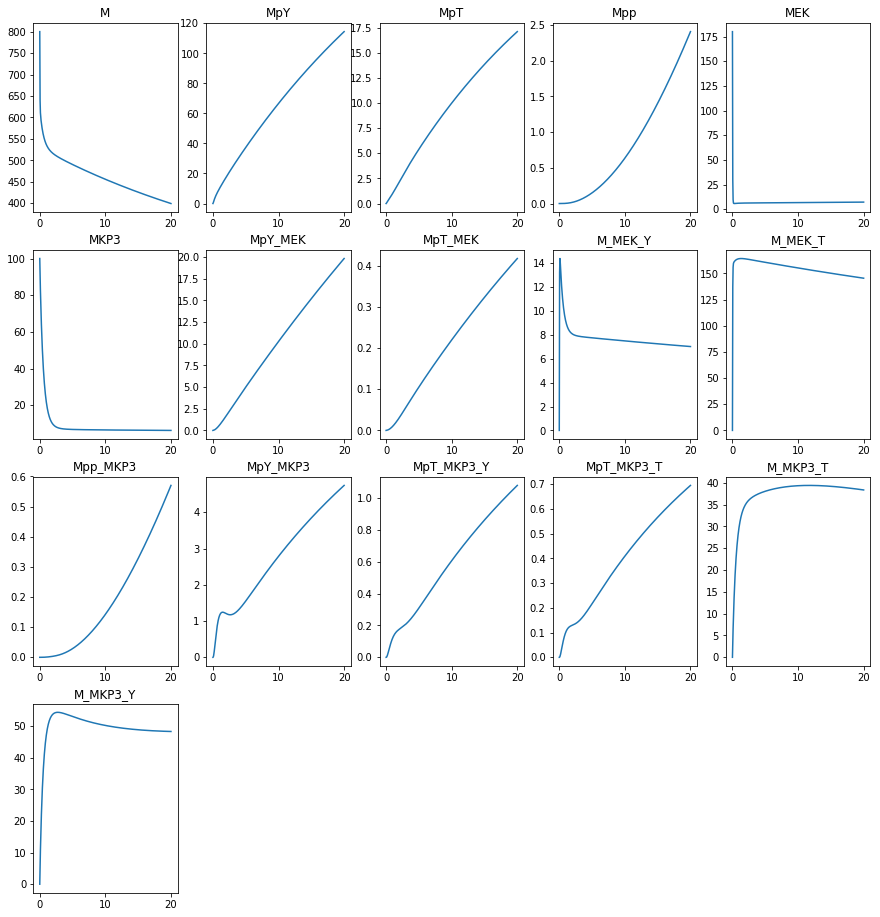

In [4]:
ns = len(sbml_model.listOfSpecies)
plt.figure(figsize=(15,4*int(math.ceil(ns/5.0))))
for n,s in enumerate(sbml_model.listOfSpecies):
    plt.subplot(int(math.ceil(ns/5.0)),5,n+1)
    plt.plot(dresults[0][:,0],dresults[0][:,n+1])
    plt.title(s)

In [5]:
sbml_model.name

'Markevich2004_MAPK_phosphoRandomElementary'

In [6]:
for r in sbml_model.listOfReactions:
    print("{0}\t{1}".format(r,sbml_model.listOfReactions[r].propensity_function))

reaction_0000001	cell * (k1 * M * MEK - k_1 * M_MEK_Y)
reaction_0000002	cell * k2 * M_MEK_Y
reaction_0000003	cell * (k3 * MpY * MEK - k_3 * MpY_MEK)
reaction_0000004	cell * k4 * MpY_MEK
reaction_0000005	cell * (k5 * M * MEK - k_5 * M_MEK_T)
reaction_0000006	cell * k6 * M_MEK_T
reaction_0000007	cell * (k7 * MpT * MEK - k_7 * MpT_MEK)
reaction_0000008	cell * k8 * MpT_MEK
reaction_0000009	cell * (h1 * Mpp * MKP3 - h_1 * Mpp_MKP3)
reaction_0000010	cell * h2 * Mpp_MKP3
reaction_0000011	cell * (h3 * MpT_MKP3_Y - h_3 * MpT * MKP3)
reaction_0000012	cell * h5 * MpT_MKP3_T
reaction_0000013	cell * (h4 * MpT * MKP3 - h_4 * MpT_MKP3_T)
reaction_0000014	cell * h8 * MpY_MKP3
reaction_0000015	cell * (h6 * M_MKP3_T - h_6 * M * MKP3)
reaction_0000017	cell * (h7 * MpY * MKP3 - h_7 * MpY_MKP3)
reaction_0000019	cell * (h9 * M_MKP3_Y - h_9 * M * MKP3)


In [7]:
new_rxns = []
for rname in sbml_model.listOfReactions:
    r = sbml_model.listOfReactions[rname]
    #print r.propensity_function
    rxns = r.propensity_function.replace('cell * ','').replace('(','').replace(')','').split('-')
    #print rxns, r.reactants, r.products
    r1 = gillespy2.Reaction(name=r.name,  reactants=r.reactants, 
                           products=r.products,
                           propensity_function = rxns[0])
    new_rxns.append(r1)
    if len(rxns) > 1:
        r2 = gillespy2.Reaction(name=r.name+'__reverse',  
                               reactants=r.products, 
                               products=r.reactants,
                               propensity_function = rxns[1])
    
        new_rxns.append(r2)
    
    
print(new_rxns)

[<gillespy2.core.gillespy2.Reaction object at 0x7f2dc1053cc0>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086eb8>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc10865f8>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086c50>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086e80>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086ba8>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc10868d0>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086a20>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086898>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc10864a8>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086dd8>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086f60>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086860>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc10866d8>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc1086cf8>, <gillespy2.core.gillespy2.Reaction object at 0x7f2dc10865c0>, <gilles

In [8]:
for s in sbml_model.listOfSpecies:
    print(s,sbml_model.listOfSpecies[s].initial_value)

M 800
MpY 0
MpT 0
Mpp 0
MEK 180
MKP3 100
MpY_MEK 0
MpT_MEK 0
M_MEK_Y 0
M_MEK_T 0
Mpp_MKP3 0
MpY_MKP3 0
MpT_MKP3_Y 0
MpT_MKP3_T 0
M_MKP3_T 0
M_MKP3_Y 0


In [9]:
r = sbml_model.listOfReactions['reaction_0000001']
print(r.propensity_function)
print(r.propensity_function.replace('(','').replace(')','').split())

cell * (k1 * M * MEK - k_1 * M_MEK_Y)
['cell', '*', 'k1', '*', 'M', '*', 'MEK', '-', 'k_1', '*', 'M_MEK_Y']


In [10]:
sbml_model.listOfReactions

OrderedDict([('reaction_0000001',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc72b0>),
             ('reaction_0000002',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc7390>),
             ('reaction_0000003',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc7470>),
             ('reaction_0000004',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc7550>),
             ('reaction_0000005',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc7630>),
             ('reaction_0000006',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc76d8>),
             ('reaction_0000007',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc77b8>),
             ('reaction_0000008',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc7898>),
             ('reaction_0000009',
              <gillespy2.core.gillespy2.Reaction at 0x7f2dc1cc7978>),
             ('reaction_0000010',
              <gillespy2.core.

In [11]:
'''If we assume the volume is 1.0, we can use the existing propensity 
functions when we convert to a stochastic model.'''
class Markevich2004_MAPK_phosphoRandomElementary(gillespy2.Model):
    def __init__(self, concentration_model):
        gillespy2.Model.__init__(self, name="Markevich2004_MAPK_phosphoRandomElementary")
        
        for s in concentration_model.listOfSpecies:
            self.add_species(gillespy2.Species(name=s, initial_value=int(concentration_model.listOfSpecies[s].initial_value)))
            
        for p in concentration_model.listOfParameters:
            self.add_parameter(concentration_model.listOfParameters[p])
            
        #for r in concentration_model.listOfReactions:
        #    self.add_reaction(concentration_model.listOfReactions[r])
        new_rxns = []
        for rname in concentration_model.listOfReactions:
            r = concentration_model.listOfReactions[rname]
            #print r.propensity_function
            rxns = r.propensity_function.replace('cell * ','').replace('(','').replace(')','').split('-')
            #print rxns, r.reactants, r.products
            r1 = gillespy2.Reaction(name=r.name,  reactants=r.reactants, 
                                   products=r.products,
                                   propensity_function = rxns[0])
            new_rxns.append(r1)
            if len(rxns) > 1:
                r2 = gillespy2.Reaction(name=r.name+'__reverse',  
                                       reactants=r.products, 
                                       products=r.reactants,
                                       propensity_function = rxns[1])

                new_rxns.append(r2)
        self.add_reaction(new_rxns)

In [12]:
from gillespy2.solvers.numpy.basic_tau_leaping_solver import BasicTauLeapingSolver
stoch_model = Markevich2004_MAPK_phosphoRandomElementary(sbml_model)
sresults = stoch_model.run(solver=BasicTauLeapingSolver(), debug=True, show_labels=False)

t =  20.0
increment =  0.04999999999999716
Setting Random number  -1.6852172063261814  for  reaction_0000001
Setting Random number  -0.22595224432380734  for  reaction_0000001__reverse
Setting Random number  -0.075471518969527  for  reaction_0000002
Setting Random number  -0.32838621616194447  for  reaction_0000003
Setting Random number  -0.8592832091067935  for  reaction_0000003__reverse
Setting Random number  -0.07747404195693201  for  reaction_0000004
Setting Random number  -0.8124504810745605  for  reaction_0000005
Setting Random number  -0.49540135364426047  for  reaction_0000005__reverse
Setting Random number  -1.0196373818731723  for  reaction_0000006
Setting Random number  -0.32851462322947533  for  reaction_0000007
Setting Random number  -0.5668218344978777  for  reaction_0000007__reverse
Setting Random number  -0.15816497617367725  for  reaction_0000008
Setting Random number  -0.15819355280120415  for  reaction_0000009
Setting Random number  -0.6136552356892421  for  reaction

Propensity of  reaction_0000003__reverse  is  0.0
Propensity of  reaction_0000004  is  0.0
Propensity of  reaction_0000005  is  153.5 tau_j is  0.005292837010257723
Propensity of  reaction_0000005__reverse  is  162.0 tau_j is  0.003058033047186793
Propensity of  reaction_0000006  is  1.296 tau_j is  0.78675723909967
Propensity of  reaction_0000007  is  0.0
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.0
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.0
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  0.42999999999999994 tau_j is  2.816753984450236
Propensity of  reaction_0000015__reverse  is  60.1106 tau_j is  0.000

Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.0
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.0
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  1.7199999999999998 tau_j is  0.704188496112559
Propensity of  reaction_0000015__reverse  is  44.65560000000001 tau_j is  0.0006141925996017911
Propensity of  reaction_0000017  is  1.36 tau_j is  0.06494572626161399
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  1.6800000000000002 tau_j is  2.6315130257882307
Propensity of  reaction_0000019__reverse  is  73.0728 tau_j is  0.01163355255773833
Projected reaction is:  reaction_0000015__reverse  at time:  0.20061419259959043  step size:

Propensity of  reaction_0000011__reverse  is  0.0
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.0
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  2.064 tau_j is  0.5868237467604657
Propensity of  reaction_0000015__reverse  is  37.7069 tau_j is  0.0007273771922586516
Propensity of  reaction_0000017  is  1.77 tau_j is  0.04990180096937573
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  2.3800000000000003 tau_j is  1.857538606438751
Propensity of  reaction_0000019__reverse  is  61.702200000000005 tau_j is  0.013777405981328079
Projected reaction is:  reaction_0000015__reverse  at time:  0.25654639473031343  step size:  0.0007273771922586516
Curr Time:  0.2558190175380548  Save time:  0.29999999999998295 step:  0.0007273771922586516
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0

Propensity of  reaction_0000005  is  383.6 tau_j is  0.0021179626722485937
Propensity of  reaction_0000005__reverse  is  160.0 tau_j is  0.0030962584602766277
Propensity of  reaction_0000006  is  1.28 tau_j is  0.7965917045884159
Propensity of  reaction_0000007  is  0.07 tau_j is  4.693066046135361
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.25 tau_j is  2.6239934976737134
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.25 tau_j is  0.607001060466195
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.94 tau_j is  0.7542621780579437
Propensity of  reaction_0000015  is  3.182 tau_j is  0.3806424303311129
Propensity of  reaction_0000015__reverse  is  15.07 

Propensity of  reaction_0000013  is  0.15 tau_j is  1.011668434110325
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  3.6119999999999997 tau_j is  0.33532785529169473
Propensity of  reaction_0000015__reverse  is  8.580000000000002 tau_j is  0.0031966362530043988
Propensity of  reaction_0000017  is  2.25 tau_j is  0.039256083429242236
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.0200000000000005 tau_j is  0.7343757281269481
Propensity of  reaction_0000019__reverse  is  14.04 tau_j is  0.060548166619736575
Projected reaction is:  reaction_0000005__reverse  at time:  0.952984345503827  step size:  0.0029843455038810873
Curr Time:  0.949999999999946  Save time:  0.9999999999999432 step:  0.031248095425944637
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_

Propensity of  reaction_0000001__reverse  is  10.0 tau_j is  0.022595224432380732
Propensity of  reaction_0000002  is  10.8 tau_j is  0.006988103608289537
Propensity of  reaction_0000003  is  0.75 tau_j is  0.437848288215926
Propensity of  reaction_0000003__reverse  is  2.0 tau_j is  0.4296416045533967
Propensity of  reaction_0000004  is  0.014 tau_j is  5.533860139780858
Propensity of  reaction_0000005  is  52.0 tau_j is  0.015624047712972319
Propensity of  reaction_0000005__reverse  is  166.0 tau_j is  0.0029843455038810873
Propensity of  reaction_0000006  is  1.328 tau_j is  0.7677992333382321
Propensity of  reaction_0000007  is  0.02 tau_j is  16.425731161473767
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.3 tau_j is  2

curr_state = {'M' : 518.0, 'MpY' : 16.0, 'MpT' : 2.0, 'Mpp' : 0, 'MEK' : 6.0, 'MKP3' : 10.0, 'MpY_MEK' : 2.0, 'MpT_MEK' : 0, 'M_MEK_Y' : 11.0, 'M_MEK_T' : 161.0, 'Mpp_MKP3' : 0, 'MpY_MKP3' : 1.0, 'MpT_MKP3_Y' : 0, 'MpT_MKP3_T' : 0, 'M_MKP3_T' : 47.0, 'M_MKP3_Y' : 42.0, }
Propensity of  reaction_0000001  is  15.54 tau_j is  0.10844383567092546
Propensity of  reaction_0000001__reverse  is  11.0 tau_j is  0.02054111312034612
Propensity of  reaction_0000002  is  11.88 tau_j is  0.006352821462081397
Propensity of  reaction_0000003  is  2.4000000000000004 tau_j is  0.13682759006747683
Propensity of  reaction_0000003__reverse  is  2.0 tau_j is  0.4296416045533967
Propensity of  reaction_0000004  is  0.014 tau_j is  5.533860139780858
Propensity of  reaction_0000005  is  155.4 tau_j is  0.005228124073838871
Propensity of  reaction_0000005__reverse  is  161.0 tau_j is  0.0030770270412686985
Propensity of  reaction_0000006  is  1.288 tau_j is  0.7916439300257548
Propensity of  reaction_0000007  i

Propensity of  reaction_0000001__reverse  is  6.0 tau_j is  0.037658707387301225
Propensity of  reaction_0000002  is  6.48 tau_j is  0.011646839347149229
Propensity of  reaction_0000003  is  5.0 tau_j is  0.0656772432323889
Propensity of  reaction_0000003__reverse  is  4.0 tau_j is  0.21482080227669836
Propensity of  reaction_0000004  is  0.028 tau_j is  2.766930069890429
Propensity of  reaction_0000005  is  258.5 tau_j is  0.0031429418997081645
Propensity of  reaction_0000005__reverse  is  160.0 tau_j is  0.0030962584602766277
Propensity of  reaction_0000006  is  1.28 tau_j is  0.7965917045884159
Propensity of  reaction_0000007  is  0.05 tau_j is  6.570292464589507
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011

Propensity of  reaction_0000007  is  0.1 tau_j is  3.2851462322947533
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.18 tau_j is  3.6444354134357133
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.18 tau_j is  0.8430570284252707
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.042 tau_j is  0.29965467919683353
Propensity of  reaction_0000015__reverse  is  5.0688 tau_j is  0.005410972824095988
Propensity of  reaction_0000017  is  2.25 tau_j is  0.039256083429242236
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.0200000000000005 tau_j is  0.73437

Propensity of  reaction_0000005__reverse  is  159.0 tau_j is  0.0031157317839261667
Propensity of  reaction_0000006  is  1.272 tau_j is  0.8016017153090977
Propensity of  reaction_0000007  is  0.02 tau_j is  16.425731161473767
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.12 tau_j is  5.46665312015357
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.12 tau_j is  1.2645855426379062
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  reaction_0000015  is  4.128 tau_j is  0.29341187338023283
Propensity of  reaction_0000015__reverse  is  3.3132 tau_j is  0.008278141691047248
Propensity 

Propensity of  reaction_0000002  is  9.72 tau_j is  0.007764559564766152
Propensity of  reaction_0000003  is  0.0
Propensity of  reaction_0000003__reverse  is  2.0 tau_j is  0.4296416045533967
Propensity of  reaction_0000004  is  0.014 tau_j is  5.533860139780858
Propensity of  reaction_0000005  is  0.0
Propensity of  reaction_0000005__reverse  is  169.0 tau_j is  0.002931368956474914
Propensity of  reaction_0000006  is  1.352 tau_j is  0.754169661148796
Propensity of  reaction_0000007  is  0.0
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.24 tau_j is  2.733326560076785
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.24 tau_j is  0.6322927713189531
Propensity of  

Propensity of  reaction_0000007  is  0.18 tau_j is  1.825081240163752
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.24 tau_j is  2.733326560076785
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.24 tau_j is  0.6322927713189531
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  reaction_0000015  is  3.9559999999999995 tau_j is  0.3061689113532865
Propensity of  reaction_0000015__reverse  is  4.4 tau_j is  0.006233440693358578
Propensity of  reaction_0000017  is  2.96 tau_j is  0.029839928282363187
Propensity of  reaction_0000017__reverse  is  1.0 tau_j is  0.36784609291655923
Prope

Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.28 tau_j is  2.3428513372086726
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.28 tau_j is  0.5419652325591026
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  reaction_0000015  is  4.042 tau_j is  0.29965467919683353
Propensity of  reaction_0000015__reverse  is  3.773 tau_j is  0.0072693185928379925
Propensity of  reaction_0000017  is  2.66 tau_j is  0.033205333727742495
Propensity of  reaction_0000017__reverse  is  1.0 tau_j is  0.36784609291655923
Propensity of  reaction_0000019  is  6.16 tau_j is  0.7176853706695175
Propensity of  reaction_0000019__reverse  is  6.174 tau_j is  0.137689708348089
Projected reaction is:  reaction_0000005__reverse  at time:  3.9

Reactions Fired:  {'reaction_0000001': 1, 'reaction_0000001__reverse': 0, 'reaction_0000002': 1, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 9, 'reaction_0000005__reverse': 5, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0, 'reaction_0000013__reverse': 0, 'reaction_0000014': 0, 'reaction_0000015': 0, 'reaction_0000015__reverse': 0, 'reaction_0000017': 0, 'reaction_0000017__reverse': 0, 'reaction_0000019': 0, 'reaction_0000019__reverse': 0}
curr_state = {'M' : 482.0, 'MpY' : 41.0, 'MpT' : 4.0, 'Mpp' : 0, 'MEK' : 0.0, 'MKP3' : 7.0, 'MpY_MEK' : 7.0, 'MpT_MEK' : 0, 'M_MEK_Y' : 5.0, 'M_MEK_T' : 168.0, 'Mpp_MKP3' : 0, 'MpY_MKP3' : 1.0, 'MpT_MKP3_Y' : 1.0, 'MpT_MKP3_T' : 0, 'M_MKP3_T' : 49.0, 'M_MKP3_Y' : 42.0, 

Propensity of  reaction_0000011__reverse  is  0.36 tau_j is  1.8222177067178567
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.36 tau_j is  0.4215285142126354
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  reaction_0000015  is  4.128 tau_j is  0.29341187338023283
Propensity of  reaction_0000015__reverse  is  3.1812 tau_j is  0.008621633047522238
Propensity of  reaction_0000017  is  2.58 tau_j is  0.034234956478990324
Propensity of  reaction_0000017__reverse  is  1.0 tau_j is  0.36784609291655923
Propensity of  reaction_0000019  is  6.300000000000001 tau_j is  0.7017368068768615
Propensity of  reaction_0000019__reverse  is  5.2056 tau_j is  0.16330418382916503
Projected reaction is:  reaction_0000005__reverse  at time:  4.753039272107977  step size:  0.003039272108246997
Step exceeds save_time, changing step size from  0.36784609291655923  to  0.04999999999999716
Cur

Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.28 tau_j is  0.5419652325591026
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  reaction_0000015  is  4.128 tau_j is  0.29341187338023283
Propensity of  reaction_0000015__reverse  is  2.0988 tau_j is  0.01306800983932616
Propensity of  reaction_0000017  is  1.84 tau_j is  0.04800336288901904
Propensity of  reaction_0000017__reverse  is  1.0 tau_j is  0.36784609291655923
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  3.4344 tau_j is  0.24752395159011806
Projected reaction is:  reaction_0000005__reverse  at time:  5.153115731783633  step size:  0.0031157317839261667
Step exceeds save_time, changing step size from  0.36784609291655923  to  0.04999999999999716
Curr Time:  5.149999999999707  Save time:  5.199999999999704 step:  0.04999999999999

curr_state = {'M' : 476.0, 'MpY' : 48.0, 'MpT' : 7.0, 'Mpp' : 0, 'MEK' : 7.0, 'MKP3' : 4.0, 'MpY_MEK' : 4.0, 'MpT_MEK' : 0, 'M_MEK_Y' : 12.0, 'M_MEK_T' : 157.0, 'Mpp_MKP3' : 0, 'MpY_MKP3' : 0.0, 'MpT_MKP3_Y' : 0.0, 'MpT_MKP3_T' : 0, 'M_MKP3_T' : 48.0, 'M_MKP3_Y' : 48.0, }
Propensity of  reaction_0000001  is  16.66 tau_j is  0.10115349377708172
Propensity of  reaction_0000001__reverse  is  12.0 tau_j is  0.018829353693650613
Propensity of  reaction_0000002  is  12.96 tau_j is  0.005823419673574614
Propensity of  reaction_0000003  is  8.400000000000002 tau_j is  0.039093597162136236
Propensity of  reaction_0000003__reverse  is  4.0 tau_j is  0.21482080227669836
Propensity of  reaction_0000004  is  0.028 tau_j is  2.766930069890429
Propensity of  reaction_0000005  is  166.6 tau_j is  0.00487665354786651
Propensity of  reaction_0000005__reverse  is  157.0 tau_j is  0.0031554226346768182
Propensity of  reaction_0000006  is  1.256 tau_j is  0.8118132021283219
Propensity of  reaction_0000007 

Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.32 tau_j is  2.0499949200575887
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.32 tau_j is  0.4742195784892148
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.128 tau_j is  0.29341187338023283
Propensity of  reaction_0000015__reverse  is  2.0944000000000003 tau_j is  0.013095463641509618
Propensity of  reaction_0000017  is  1.96 tau_j is  0.04506438148765053
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.720000000000001 tau_j is  0.6578782564470577
Propensity of  reaction_0000019__reverse  is  3.4272 tau_j is  0.24804395989177797
Projected reaction is:  reaction_0000005__reverse  at time:  5.272229547919635  step size:  0.0031756497028478234
Curr Time:  5.269053898216788  Save time:  5.299999999999699 st

Propensity of  reaction_0000002  is  11.88 tau_j is  0.006352821462081397
Propensity of  reaction_0000003  is  6.000000000000001 tau_j is  0.05473103602699073
Propensity of  reaction_0000003__reverse  is  5.0 tau_j is  0.17185664182135868
Propensity of  reaction_0000004  is  0.035 tau_j is  2.213544055912343
Propensity of  reaction_0000005  is  118.25000000000001 tau_j is  0.006870617176106219
Propensity of  reaction_0000005__reverse  is  159.0 tau_j is  0.0031157317839261667
Propensity of  reaction_0000006  is  1.272 tau_j is  0.8016017153090977
Propensity of  reaction_0000007  is  0.2 tau_j is  1.6425731161473767
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.32 tau_j is  2.0499949200575887
Propensity of  reaction_0000012  

Propensity of  reaction_0000015__reverse  is  2.0944000000000003 tau_j is  0.013095463641509618
Propensity of  reaction_0000017  is  2.0 tau_j is  0.04416309385789752
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.720000000000001 tau_j is  0.6578782564470577
Propensity of  reaction_0000019__reverse  is  3.4272 tau_j is  0.24804395989177797
Projected reaction is:  reaction_0000005__reverse  at time:  5.325185796829471  step size:  0.0031756497028478234
Curr Time:  5.3220101471266235  Save time:  5.349999999999696 step:  0.0031756497028478234
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 2, 'reaction_0000005__reverse': 0, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'r

Propensity of  reaction_0000013  is  0.32 tau_j is  0.4742195784892148
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.128 tau_j is  0.29341187338023283
Propensity of  reaction_0000015__reverse  is  2.0768 tau_j is  0.013206442146946142
Propensity of  reaction_0000017  is  2.0 tau_j is  0.04416309385789752
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.720000000000001 tau_j is  0.6578782564470577
Propensity of  reaction_0000019__reverse  is  3.3984 tau_j is  0.25014602734848795
Projected reaction is:  reaction_0000005__reverse  at time:  5.356192516920249  step size:  0.0030962584602766277
Curr Time:  5.353096258459972  Save time:  5.399999999999693 step:  0.0030962584602766277
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 1, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000

Propensity of  reaction_0000019  is  6.720000000000001 tau_j is  0.6578782564470577
Propensity of  reaction_0000019__reverse  is  3.4055999999999997 tau_j is  0.249617177396377
Projected reaction is:  reaction_0000005__reverse  at time:  5.386983205986507  step size:  0.0030962584602766277
Curr Time:  5.38388694752623  Save time:  5.399999999999693 step:  0.0030962584602766277
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 4, 'reaction_0000005__reverse': 0, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0, 'reaction_0000013__reverse': 0, 'reaction_0000014': 0, 'reaction_0000015': 0, 'reaction_0000015__reverse': 0, 

Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.4 tau_j is  1.6399959360460707
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.4 tau_j is  0.3793756627913718
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.128 tau_j is  0.29341187338023283
Propensity of  reaction_0000015__reverse  is  2.6125000000000003 tau_j is  0.01049842643091971
Propensity of  reaction_0000017  is  2.55 tau_j is  0.0346377206728608
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  4.275 tau_j is  0.19885292616166114


curr_state = {'M' : 473.0, 'MpY' : 50.0, 'MpT' : 8.0, 'Mpp' : 0, 'MEK' : 6.0, 'MKP3' : 5.0, 'MpY_MEK' : 6.0, 'MpT_MEK' : 0, 'M_MEK_Y' : 7.0, 'M_MEK_T' : 161.0, 'Mpp_MKP3' : 0, 'MpY_MKP3' : 0.0, 'MpT_MKP3_Y' : 0.0, 'MpT_MKP3_T' : 0, 'M_MKP3_T' : 48.0, 'M_MKP3_Y' : 47.0, }
Propensity of  reaction_0000001  is  14.190000000000001 tau_j is  0.11876090248951242
Propensity of  reaction_0000001__reverse  is  7.0 tau_j is  0.03227889204625819
Propensity of  reaction_0000002  is  7.5600000000000005 tau_j is  0.009983005154699338
Propensity of  reaction_0000003  is  7.5 tau_j is  0.0437848288215926
Propensity of  reaction_0000003__reverse  is  6.0 tau_j is  0.14321386818446558
Propensity of  reaction_0000004  is  0.042 tau_j is  1.8446200465936193
Propensity of  reaction_0000005  is  141.9 tau_j is  0.00572551431342185
Propensity of  reaction_0000005__reverse  is  161.0 tau_j is  0.0030770270412686985
Propensity of  reaction_0000006  is  1.288 tau_j is  0.7916439300257548
Propensity of  reaction_

Propensity of  reaction_0000013  is  0.4 tau_j is  0.3793756627913718
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.128 tau_j is  0.29341187338023283
Propensity of  reaction_0000015__reverse  is  2.607 tau_j is  0.010520575009887895
Propensity of  reaction_0000017  is  2.55 tau_j is  0.0346377206728608
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  4.266 tau_j is  0.1992724471029305
Projected reaction is:  reaction_0000005__reverse  at time:  5.462404749069088  step size:  0.0030770270412686985
Curr Time:  5.459327722027819  Save time:  5.499999999999687 step:  0.0030770270412686985
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005'

Propensity of  reaction_0000001__reverse  is  6.0 tau_j is  0.037658707387301225
Propensity of  reaction_0000002  is  6.48 tau_j is  0.011646839347149229
Propensity of  reaction_0000003  is  6.25 tau_j is  0.052541794585911114
Propensity of  reaction_0000003__reverse  is  7.0 tau_j is  0.12275474415811335
Propensity of  reaction_0000004  is  0.049 tau_j is  1.5811028970802452
Propensity of  reaction_0000005  is  118.25000000000001 tau_j is  0.006870617176106219
Propensity of  reaction_0000005__reverse  is  162.0 tau_j is  0.003058033047186793
Propensity of  reaction_0000006  is  1.296 tau_j is  0.78675723909967
Propensity of  reaction_0000007  is  0.2 tau_j is  1.6425731161473767
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0

Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.48 tau_j is  0.31614638565947656
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.042 tau_j is  0.29965467919683353
Propensity of  reaction_0000015__reverse  is  3.1218 tau_j is  0.008785681033627313
Propensity of  reaction_0000017  is  3.0 tau_j is  0.029442062571931677
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  5.1084 tau_j is  0.16641145159758466
Projected reaction is:  reaction_0000005__reverse  at time:  5.530393178666035  step size:  0.003039272108246997
Curr Time:  5.527353906557788  Save time:  5.5499999999996845 step:  0.003039272108246997
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse'

curr_state = {'M' : 474.0, 'MpY' : 51.0, 'MpT' : 8.0, 'Mpp' : 0, 'MEK' : 7.0, 'MKP3' : 6.0, 'MpY_MEK' : 6.0, 'MpT_MEK' : 0, 'M_MEK_Y' : 5.0, 'M_MEK_T' : 162.0, 'Mpp_MKP3' : 0, 'MpY_MKP3' : 0.0, 'MpT_MKP3_Y' : 0.0, 'MpT_MKP3_T' : 0, 'M_MKP3_T' : 47.0, 'M_MKP3_Y' : 47.0, }
Propensity of  reaction_0000001  is  16.59 tau_j is  0.10158030176770232
Propensity of  reaction_0000001__reverse  is  5.0 tau_j is  0.045190448864761465
Propensity of  reaction_0000002  is  5.4 tau_j is  0.013976207216579073
Propensity of  reaction_0000003  is  8.925 tau_j is  0.03679397379965764
Propensity of  reaction_0000003__reverse  is  6.0 tau_j is  0.14321386818446558
Propensity of  reaction_0000004  is  0.042 tau_j is  1.8446200465936193
Propensity of  reaction_0000005  is  165.90000000000003 tau_j is  0.00489723014511489
Propensity of  reaction_0000005__reverse  is  162.0 tau_j is  0.003058033047186793
Propensity of  reaction_0000006  is  1.296 tau_j is  0.78675723909967
Propensity of  reaction_0000007  is  0

Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.48 tau_j is  1.3666632800383924
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.48 tau_j is  0.31614638565947656
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.042 tau_j is  0.29965467919683353
Propensity of  reaction_0000015__reverse  is  3.1218 tau_j is  0.008785681033627313
Propensity of  reaction_0000017  is  3.06 tau_j is  0.028864767227383997
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  5.1084 tau_j is  0.16641145159758466
Projected reaction is:  reaction_0000005__reverse  at time:  5.59919633533166  step size:  0.003039272108246997
Curr Time:  5.596157063223413  Save time:  5.599999999999682 step:  0.003039272108246997
Reactions Fired:  {'reactio

Propensity of  reaction_0000002  is  5.4 tau_j is  0.013976207216579073
Propensity of  reaction_0000003  is  6.25 tau_j is  0.052541794585911114
Propensity of  reaction_0000003__reverse  is  7.0 tau_j is  0.12275474415811335
Propensity of  reaction_0000004  is  0.049 tau_j is  1.5811028970802452
Propensity of  reaction_0000005  is  118.25000000000001 tau_j is  0.006870617176106219
Propensity of  reaction_0000005__reverse  is  163.0 tau_j is  0.003039272108246997
Propensity of  reaction_0000006  is  1.304 tau_j is  0.7819305075714511
Propensity of  reaction_0000007  is  0.2 tau_j is  1.6425731161473767
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.48 tau_j is  1.3666632800383924
Propensity of  reaction_0000012  is  0.0
Propen

Propensity of  reaction_0000013  is  0.48 tau_j is  0.31614638565947656
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  4.042 tau_j is  0.29965467919683353
Propensity of  reaction_0000015__reverse  is  3.1482 tau_j is  0.008712006559550773
Propensity of  reaction_0000017  is  3.0 tau_j is  0.029442062571931677
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  5.1516 tau_j is  0.16501596772674537
Projected reaction is:  reaction_0000005__reverse  at time:  5.656211990243881  step size:  0.0031157317839261667
Curr Time:  5.653096258459955  Save time:  5.699999999999676 step:  0.0031157317839261667
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_00

Propensity of  reaction_0000001  is  16.66 tau_j is  0.10115349377708172
Propensity of  reaction_0000001__reverse  is  5.0 tau_j is  0.045190448864761465
Propensity of  reaction_0000002  is  5.4 tau_j is  0.013976207216579073
Propensity of  reaction_0000003  is  8.75 tau_j is  0.037529853275650796
Propensity of  reaction_0000003__reverse  is  7.0 tau_j is  0.12275474415811335
Propensity of  reaction_0000004  is  0.049 tau_j is  1.5811028970802452
Propensity of  reaction_0000005  is  166.6 tau_j is  0.00487665354786651
Propensity of  reaction_0000005__reverse  is  161.0 tau_j is  0.0030770270412686985
Propensity of  reaction_0000006  is  1.288 tau_j is  0.7916439300257548
Propensity of  reaction_0000007  is  0.28 tau_j is  1.1732665115338403
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_00

Propensity of  reaction_0000011__reverse  is  0.56 tau_j is  1.1714256686043363
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.56 tau_j is  0.2709826162795513
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.0
Propensity of  reaction_0000015  is  3.9559999999999995 tau_j is  0.3061689113532865
Propensity of  reaction_0000015__reverse  is  3.6652000000000005 tau_j is  0.007483122080862639
Propensity of  reaction_0000017  is  3.5 tau_j is  0.025236053633084295
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  5.9976 tau_j is  0.14173940565244456
Projected reaction is:  reaction_0000005__reverse  at time:  5.724789541005538  step size:  0.0030962584602766277
Curr Time:  5.721693282545261  Save time:  5.749999999999673 step:  0.0030962584602766277
Reactions Fired:  {'reaction_0000001': 0, '

curr_state = {'M' : 473.0, 'MpY' : 51.0, 'MpT' : 8.0, 'Mpp' : 0, 'MEK' : 4.0, 'MKP3' : 8.0, 'MpY_MEK' : 6.0, 'MpT_MEK' : 0, 'M_MEK_Y' : 8.0, 'M_MEK_T' : 162.0, 'Mpp_MKP3' : 0, 'MpY_MKP3' : 0.0, 'MpT_MKP3_Y' : 0.0, 'MpT_MKP3_T' : 0, 'M_MKP3_T' : 46.0, 'M_MKP3_Y' : 46.0, }
Propensity of  reaction_0000001  is  9.46 tau_j is  0.17814135373426865
Propensity of  reaction_0000001__reverse  is  8.0 tau_j is  0.028244030540475917
Propensity of  reaction_0000002  is  8.64 tau_j is  0.00873512951036192
Propensity of  reaction_0000003  is  5.1000000000000005 tau_j is  0.06438945414940087
Propensity of  reaction_0000003__reverse  is  6.0 tau_j is  0.14321386818446558
Propensity of  reaction_0000004  is  0.042 tau_j is  1.8446200465936193
Propensity of  reaction_0000005  is  94.60000000000001 tau_j is  0.008588271470132774
Propensity of  reaction_0000005__reverse  is  162.0 tau_j is  0.003058033047186793
Propensity of  reaction_0000006  is  1.296 tau_j is  0.78675723909967
Propensity of  reaction_00

Propensity of  reaction_0000019__reverse  is  1.7064 tau_j is  0.4981811177573262
Projected reaction is:  reaction_0000005__reverse  at time:  6.10315542263433  step size:  0.0031554226346768182
Curr Time:  6.099999999999653  Save time:  6.14999999999965 step:  0.026301437524719737
Reactions Fired:  {'reaction_0000001': 1, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 1, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 4, 'reaction_0000005__reverse': 4, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0, 'reaction_0000013__reverse': 0, 'reaction_0000014': 0, 'reaction_0000015': 0, 'reaction_0000015__reverse': 0, 'reaction_0000017': 0, 'reaction_0000017__reverse': 0, 'reaction_0000019': 0, 'reaction_0000019__

Propensity of  reaction_0000011__reverse  is  0.18 tau_j is  3.6444354134357133
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.18 tau_j is  0.8430570284252707
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  reaction_0000015  is  4.3 tau_j is  0.28167539844502354
Propensity of  reaction_0000015__reverse  is  1.5708000000000002 tau_j is  0.01746061818867949
Propensity of  reaction_0000017  is  1.56 tau_j is  0.05661935109986861
Propensity of  reaction_0000017__reverse  is  1.0 tau_j is  0.36784609291655923
Propensity of  reaction_0000019  is  6.300000000000001 tau_j is  0.7017368068768615
Propensity of  reaction_0000019__reverse  is  2.5704000000000002 tau_j is  0.33072527985570394
Projected reaction is:  reaction_0000005  at time:  6.503103324984637  step size:  0.0031033249850059607
Curr Time:  6.4999999999996305  Save time:  6.549999999999628 step:  0.03494051804144

Propensity of  reaction_0000004  is  0.063 tau_j is  1.2297466977290796
Propensity of  reaction_0000005  is  188.8 tau_j is  0.0043032334802677995
Propensity of  reaction_0000005__reverse  is  158.0 tau_j is  0.003135451605343421
Propensity of  reaction_0000006  is  1.264 tau_j is  0.8066751438870035
Propensity of  reaction_0000007  is  0.28 tau_j is  1.1732665115338403
Propensity of  reaction_0000007__reverse  is  1.0 tau_j is  0.5668218344978777
Propensity of  reaction_0000008  is  0.45 tau_j is  0.3514777248303939
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.42000000000000004 tau_j is  1.5619008914724484
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.42000000000000004 tau_j is  0.3613101550394017
Propensity of  reaction_0000013__reverse  is  0.0
Pr

Step exceeds save_time, changing step size from  0.14479512959467142  to  0.03233803302011573
Curr Time:  7.3176619669794665  Save time:  7.349999999999582 step:  0.03233803302011573
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 8, 'reaction_0000005__reverse': 8, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0, 'reaction_0000013__reverse': 0, 'reaction_0000014': 0, 'reaction_0000015': 0, 'reaction_0000015__reverse': 0, 'reaction_0000017': 0, 'reaction_0000017__reverse': 0, 'reaction_0000019': 0, 'reaction_0000019__reverse': 0}
curr_state = {'M' : 463.0, 'MpY' : 59.0, 'MpT' : 7.0, 'Mpp' : 1.0, 'MEK' : 5.0, 'MKP3' 

Propensity of  reaction_0000011__reverse  is  0.35000000000000003 tau_j is  1.8742810697669379
Propensity of  reaction_0000012  is  0.5 tau_j is  2.209297187694164
Propensity of  reaction_0000013  is  0.35000000000000003 tau_j is  0.4335721860472821
Propensity of  reaction_0000013__reverse  is  1.0 tau_j is  1.098134215782218
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  reaction_0000015  is  3.8699999999999997 tau_j is  0.31297266493891507
Propensity of  reaction_0000015__reverse  is  2.585 tau_j is  0.010610111818482688
Propensity of  reaction_0000017  is  2.75 tau_j is  0.03211861371483456
Propensity of  reaction_0000017__reverse  is  1.0 tau_j is  0.36784609291655923
Propensity of  reaction_0000019  is  6.720000000000001 tau_j is  0.6578782564470577
Propensity of  reaction_0000019__reverse  is  4.2299999999999995 tau_j is  0.20096838282295545
Projected reaction is:  reaction_0000005__reverse  at time:  7.8031354516049  step size:  0.003135451

curr_state = {'M' : 464.0, 'MpY' : 58.0, 'MpT' : 8.0, 'Mpp' : 1.0, 'MEK' : 4.0, 'MKP3' : 7.0, 'MpY_MEK' : 10.0, 'MpT_MEK' : 1.0, 'M_MEK_Y' : 5.0, 'M_MEK_T' : 160.0, 'Mpp_MKP3' : 0, 'MpY_MKP3' : 1.0, 'MpT_MKP3_Y' : 0.0, 'MpT_MKP3_T' : 0.0, 'M_MKP3_T' : 45.0, 'M_MKP3_Y' : 47.0, }
Propensity of  reaction_0000001  is  9.28 tau_j is  0.18159668171618334
Propensity of  reaction_0000001__reverse  is  5.0 tau_j is  0.045190448864761465
Propensity of  reaction_0000002  is  5.4 tau_j is  0.013976207216579073
Propensity of  reaction_0000003  is  5.800000000000001 tau_j is  0.05661831313136973
Propensity of  reaction_0000003__reverse  is  10.0 tau_j is  0.08592832091067934
Propensity of  reaction_0000004  is  0.07 tau_j is  1.1067720279561715
Propensity of  reaction_0000005  is  92.80000000000001 tau_j is  0.008754854321924143
Propensity of  reaction_0000005__reverse  is  160.0 tau_j is  0.0030962584602766277
Propensity of  reaction_0000006  is  1.28 tau_j is  0.7965917045884159
Propensity of  rea

Propensity of  reaction_0000019  is  6.720000000000001 tau_j is  0.6578782564470577
Propensity of  reaction_0000019__reverse  is  4.9896 tau_j is  0.17037362901657477
Projected reaction is:  reaction_0000005__reverse  at time:  8.803175649702348  step size:  0.0031756497028478234
Step exceeds save_time, changing step size from  0.36784609291655923  to  0.04999999999999716
Curr Time:  8.7999999999995  Save time:  8.849999999999497 step:  0.04999999999999716
Reactions Fired:  {'reaction_0000001': 2, 'reaction_0000001__reverse': 0, 'reaction_0000002': 1, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 7, 'reaction_0000005__reverse': 2, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0, 'reaction_0000013__reverse': 

Propensity of  reaction_0000015__reverse  is  0.9966 tau_j is  0.027520709462951782
Propensity of  reaction_0000017  is  1.28 tau_j is  0.06900483415296486
Propensity of  reaction_0000017__reverse  is  1.0 tau_j is  0.36784609291655923
Propensity of  reaction_0000019  is  7.280000000000001 tau_j is  0.6072722367203609
Propensity of  reaction_0000019__reverse  is  1.6308 tau_j is  0.5212756066599837
Projected reaction is:  reaction_0000005__reverse  at time:  9.203155422634154  step size:  0.0031554226346768182
Curr Time:  9.199999999999477  Save time:  9.249999999999474 step:  0.027520709462951782
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 4, 'reaction_0000005__reverse': 4, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction

Propensity of  reaction_0000017  is  4.38 tau_j is  0.020165796282144984
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  7.000000000000001 tau_j is  0.6315631261891753
Propensity of  reaction_0000019__reverse  is  4.7952 tau_j is  0.1772806680307602
Projected reaction is:  reaction_0000005__reverse  at time:  9.652984345503333  step size:  0.0029843455038810873
Curr Time:  9.649999999999451  Save time:  9.699999999999449 step:  0.03659686851687209
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 2, 'reaction_0000005__reverse': 5, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0,

Propensity of  reaction_0000015__reverse  is  3.9688000000000003 tau_j is  0.006910688130109289
Propensity of  reaction_0000017  is  6.08 tau_j is  0.01452733350588734
Propensity of  reaction_0000017__reverse  is  0.0
Propensity of  reaction_0000019  is  6.86 tau_j is  0.6444521695807912
Propensity of  reaction_0000019__reverse  is  6.4944 tau_j is  0.1308968125371245
Projected reaction is:  reaction_0000005__reverse  at time:  10.053020739960674  step size:  0.0030207399612454905
Step exceeds save_time, changing step size from  0.06988103608289536  to  0.04999999999999716
Curr Time:  10.049999999999429  Save time:  10.099999999999426 step:  0.04999999999999716
Reactions Fired:  {'reaction_0000001': 3, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 1, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 8, 'reaction_0000005__reverse': 9, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0,

Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 6, 'reaction_0000005__reverse': 5, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0, 'reaction_0000013__reverse': 0, 'reaction_0000014': 0, 'reaction_0000015': 0, 'reaction_0000015__reverse': 0, 'reaction_0000017': 0, 'reaction_0000017__reverse': 0, 'reaction_0000019': 0, 'reaction_0000019__reverse': 0}
curr_state = {'M' : 444.0, 'MpY' : 72.0, 'MpT' : 10.0, 'Mpp' : 1.0, 'MEK' : 2.0, 'MKP3' : 5.0, 'MpY_MEK' : 11.0, 'MpT_MEK' : 0.0, 'M_MEK_Y' : 5.0, 'M_MEK_T' : 162.0, 'Mpp_MKP3' : 1.0, 'MpY_MKP3' : 2.0, 'MpT_MKP3_Y' : 0.0, 'MpT_MKP3_T' : 0.0, 'M_MKP3_T' : 42.0, 'M_MKP3_Y

Propensity of  reaction_0000005  is  203.4 tau_j is  0.003994348481192529
Propensity of  reaction_0000005__reverse  is  153.0 tau_j is  0.0032379173440801336
Propensity of  reaction_0000006  is  1.224 tau_j is  0.8330370766937683
Propensity of  reaction_0000007  is  0.45 tau_j is  0.7300324960655007
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.44999999999999996 tau_j is  0.3515412284471204
Propensity of  reaction_0000009__reverse  is  1.0 tau_j is  0.6136552356892421
Propensity of  reaction_0000010  is  0.092 tau_j is  16.807662800729727
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  1.0 tau_j is  0.6559983744184283
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  1.0 tau_j is  0.15175026511654874
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  0.47 tau_j is  1.5085243561158874
Propensity of  rea

Propensity of  reaction_0000001__reverse  is  4.0 tau_j is  0.056488061080951835
Propensity of  reaction_0000002  is  4.32 tau_j is  0.01747025902072384
Propensity of  reaction_0000003  is  13.650000000000002 tau_j is  0.024057598253622303
Propensity of  reaction_0000003__reverse  is  17.0 tau_j is  0.050546071123929025
Propensity of  reaction_0000004  is  0.11900000000000001 tau_j is  0.6510423693859833
Propensity of  reaction_0000005  is  156.45000000000002 tau_j is  0.005193035992806395
Propensity of  reaction_0000005__reverse  is  152.0 tau_j is  0.0032592194318701345
Propensity of  reaction_0000006  is  1.216 tau_j is  0.8385175837772799
Propensity of  reaction_0000007  is  0.35000000000000003 tau_j is  0.9386132092270723
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  2.0 tau_j is  0.30682761784462104
Propensity of  reaction_0000010  is  0.184 tau_j is

curr_state = {'M' : 440.0, 'MpY' : 80.0, 'MpT' : 10.0, 'Mpp' : 0.0, 'MEK' : 4.0, 'MKP3' : 6.0, 'MpY_MEK' : 14.0, 'MpT_MEK' : 0.0, 'M_MEK_Y' : 7.0, 'M_MEK_T' : 155.0, 'Mpp_MKP3' : 2.0, 'MpY_MKP3' : 3.0, 'MpT_MKP3_Y' : 1.0, 'MpT_MKP3_T' : 0.0, 'M_MKP3_T' : 40.0, 'M_MKP3_Y' : 48.0, }
Propensity of  reaction_0000001  is  8.8 tau_j is  0.19150195526433877
Propensity of  reaction_0000001__reverse  is  7.0 tau_j is  0.03227889204625819
Propensity of  reaction_0000002  is  7.5600000000000005 tau_j is  0.009983005154699338
Propensity of  reaction_0000003  is  8.0 tau_j is  0.04104827702024306
Propensity of  reaction_0000003__reverse  is  14.0 tau_j is  0.06137737207905668
Propensity of  reaction_0000004  is  0.098 tau_j is  0.7905514485401226
Propensity of  reaction_0000005  is  88.0 tau_j is  0.009232391830392733
Propensity of  reaction_0000005__reverse  is  155.0 tau_j is  0.0031961377654468417
Propensity of  reaction_0000006  is  1.24 tau_j is  0.8222882111880422
Propensity of  reaction_0000

Propensity of  reaction_0000011__reverse  is  0.63 tau_j is  1.0412672609816322
Propensity of  reaction_0000012  is  0.5 tau_j is  2.209297187694164
Propensity of  reaction_0000013  is  0.63 tau_j is  0.2408734366929345
Propensity of  reaction_0000013__reverse  is  1.0 tau_j is  1.098134215782218
Propensity of  reaction_0000014  is  1.88 tau_j is  0.37713108902897186
Propensity of  reaction_0000015  is  3.3539999999999996 tau_j is  0.36112230569874815
Propensity of  reaction_0000015__reverse  is  3.3726000000000003 tau_j is  0.008132342718015105
Propensity of  reaction_0000017  is  5.8100000000000005 tau_j is  0.015202441947641141
Propensity of  reaction_0000017__reverse  is  4.0 tau_j is  0.09196152322913981
Propensity of  reaction_0000019  is  6.580000000000001 tau_j is  0.6718756661586972
Propensity of  reaction_0000019__reverse  is  5.5188 tau_j is  0.15403643171361556
Projected reaction is:  reaction_0000005__reverse  at time:  12.253175649702152  step size:  0.0031756497028478234

curr_state = {'M' : 449.0, 'MpY' : 82.0, 'MpT' : 11.0, 'Mpp' : 1.0, 'MEK' : 16.0, 'MKP3' : 7.0, 'MpY_MEK' : 15.0, 'MpT_MEK' : 1.0, 'M_MEK_Y' : 8.0, 'M_MEK_T' : 140.0, 'Mpp_MKP3' : 1.0, 'MpY_MKP3' : 4.0, 'MpT_MKP3_Y' : 1.0, 'MpT_MKP3_T' : 0.0, 'M_MKP3_T' : 39.0, 'M_MKP3_Y' : 48.0, }
Propensity of  reaction_0000001  is  35.92 tau_j is  0.04691584650128567
Propensity of  reaction_0000001__reverse  is  8.0 tau_j is  0.028244030540475917
Propensity of  reaction_0000002  is  8.64 tau_j is  0.00873512951036192
Propensity of  reaction_0000003  is  32.800000000000004 tau_j is  0.01001177488298611
Propensity of  reaction_0000003__reverse  is  15.0 tau_j is  0.05728554727378623
Propensity of  reaction_0000004  is  0.105 tau_j is  0.7378480186374478
Propensity of  reaction_0000005  is  359.20000000000005 tau_j is  0.002261833187846772
Propensity of  reaction_0000005__reverse  is  140.0 tau_j is  0.0035385810974590034
Propensity of  reaction_0000006  is  1.12 tau_j is  0.910390519529618
Propensity 

Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.315 tau_j is  0.5022017549244576
Propensity of  reaction_0000009__reverse  is  1.0 tau_j is  0.6136552356892421
Propensity of  reaction_0000010  is  0.092 tau_j is  16.807662800729727
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.84 tau_j is  0.7809504457362243
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.84 tau_j is  0.1806550775197009
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  2.3499999999999996 tau_j is  0.3017048712231775
Propensity of  reaction_0000015  is  3.268 tau_j is  0.3706255242697678
Propensity of  reaction_0000015__reverse  is  3.3572 tau_j is  0.00816964704240967
Propensity of  reaction_0000017  is  5.74 tau_j is  0.01538783758114896
Propensity of  reaction_0000017__reverse  is  5.0 tau_j is  0.07356921858331185
Propensity of  reaction_0000019

Propensity of  reaction_0000019__reverse  is  3.915 tau_j is  0.21713825270526219
Projected reaction is:  reaction_0000005__reverse  at time:  13.703259219431091  step size:  0.0032592194318701345
Step exceeds save_time, changing step size from  0.14479512959467142  to  0.04999999999999716
Curr Time:  13.699999999999221  Save time:  13.749999999999218 step:  0.04999999999999716
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 1, 'reaction_0000002': 0, 'reaction_0000003': 0, 'reaction_0000003__reverse': 0, 'reaction_0000004': 0, 'reaction_0000005': 10, 'reaction_0000005__reverse': 13, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 0, 'reaction_0000010': 0, 'reaction_0000011': 0, 'reaction_0000011__reverse': 0, 'reaction_0000012': 0, 'reaction_0000013': 0, 'reaction_0000013__reverse': 0, 'reaction_0000014': 0, 'reaction_0000015': 0, 'reaction_0000015__reverse': 

Propensity of  reaction_0000005__reverse  is  152.0 tau_j is  0.0032592194318701345
Propensity of  reaction_0000006  is  1.216 tau_j is  0.8385175837772799
Propensity of  reaction_0000007  is  0.055 tau_j is  5.9729931496268245
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.63 tau_j is  0.2511008774622288
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.77 tau_j is  0.8519459408031537
Propensity of  reaction_0000012  is  0.5 tau_j is  2.209297187694164
Propensity of  reaction_0000013  is  0.77 tau_j is  0.19707826638512824
Propensity of  reaction_0000013__reverse  is  1.0 tau_j is  1.098134215782218
Propensity of  reaction_0000014  is  1.41 tau_j is  0.5028414520386292
Propensity of  reaction_0000015  is  3.3539999999999996 tau_j is  0.3611223056

Propensity of  reaction_0000005  is  264.6 tau_j is  0.0030704855671752095
Propensity of  reaction_0000005__reverse  is  139.0 tau_j is  0.0035640385154263343
Propensity of  reaction_0000006  is  1.112 tau_j is  0.916940091612565
Propensity of  reaction_0000007  is  0.72 tau_j is  0.456270310040938
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.36 tau_j is  0.43942653555890043
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.48 tau_j is  1.3666632800383924
Propensity of  reaction_0000012  is  0.5 tau_j is  2.209297187694164
Propensity of  reaction_0000013  is  0.48 tau_j is  0.31614638565947656
Propensity of  reaction_0000013__reverse  is  1.0 tau_j is  1.098134215782218
Propensity of  reaction_0000014  is  1.88 tau_j is  0.37713108902897186
Prop

Propensity of  reaction_0000017  is  3.56 tau_j is  0.02481072688645928
Propensity of  reaction_0000017__reverse  is  3.0 tau_j is  0.12261536430551974
Propensity of  reaction_0000019  is  7.140000000000001 tau_j is  0.6191795354795837
Propensity of  reaction_0000019__reverse  is  3.0816 tau_j is  0.27586197408524843
Projected reaction is:  reaction_0000005__reverse  at time:  15.003280803665666  step size:  0.003280803666518281
Step exceeds save_time, changing step size from  0.14479512959467142  to  0.04999999999999716
Curr Time:  14.999999999999147  Save time:  15.049999999999145 step:  0.04999999999999716
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 0, 'reaction_0000002': 0, 'reaction_0000003': 1, 'reaction_0000003__reverse': 2, 'reaction_0000004': 0, 'reaction_0000005': 4, 'reaction_0000005__reverse': 6, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__reverse': 0, 'reaction_0000008': 0, 'reaction_0000009': 0, 'reaction_0000009__reverse': 

Propensity of  reaction_0000001  is  14.875 tau_j is  0.11329191303033152
Propensity of  reaction_0000001__reverse  is  5.0 tau_j is  0.045190448864761465
Propensity of  reaction_0000002  is  5.4 tau_j is  0.013976207216579073
Propensity of  reaction_0000003  is  16.975 tau_j is  0.019345285193634428
Propensity of  reaction_0000003__reverse  is  13.0 tau_j is  0.06609870839283026
Propensity of  reaction_0000004  is  0.091 tau_j is  0.8513630984278243
Propensity of  reaction_0000005  is  148.75 tau_j is  0.005461851973610491
Propensity of  reaction_0000005__reverse  is  154.0 tau_j is  0.003216891906780912
Propensity of  reaction_0000006  is  1.232 tau_j is  0.8276277450269256
Propensity of  reaction_0000007  is  0.385 tau_j is  0.8532847356609748
Propensity of  reaction_0000007__reverse  is  1.0 tau_j is  0.5668218344978777
Propensity of  reaction_0000008  is  0.45 tau_j is  0.3514777248303939
Propensity of  reaction_0000009  is  0.72 tau_j is  0.21971326777945022
Propensity of  reacti

Propensity of  reaction_0000012  is  0.5 tau_j is  2.209297187694164
Propensity of  reaction_0000013  is  0.84 tau_j is  0.1806550775197009
Propensity of  reaction_0000013__reverse  is  1.0 tau_j is  1.098134215782218
Propensity of  reaction_0000014  is  1.41 tau_j is  0.5028414520386292
Propensity of  reaction_0000015  is  3.4399999999999995 tau_j is  0.3520942480562795
Propensity of  reaction_0000015__reverse  is  3.2494 tau_j is  0.00844067798694459
Propensity of  reaction_0000017  is  7.0 tau_j is  0.012618026816542147
Propensity of  reaction_0000017__reverse  is  3.0 tau_j is  0.12261536430551974
Propensity of  reaction_0000019  is  6.720000000000001 tau_j is  0.6578782564470577
Propensity of  reaction_0000019__reverse  is  5.3172 tau_j is  0.15987667557005594
Projected reaction is:  reaction_0000005__reverse  at time:  16.003370077234766  step size:  0.0033700772356752414
Step exceeds save_time, changing step size from  0.14479512959467142  to  0.04999999999999716
Curr Time:  15.

Propensity of  reaction_0000006  is  1.16 tau_j is  0.8789977429941142
Propensity of  reaction_0000007  is  0.455 tau_j is  0.7220101609439018
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.8099999999999999 tau_j is  0.1953006824706224
Propensity of  reaction_0000009__reverse  is  0.0
Propensity of  reaction_0000010  is  0.0
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  1.17 tau_j is  0.5606823712978021
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  1.17 tau_j is  0.1297010812961955
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  1.41 tau_j is  0.5028414520386292
Propensity of  reaction_0000015  is  3.526 tau_j is  0.3435065834695409
Propensity of  reaction_0000015__reverse  is  4.1976 tau_j is  0.00653400491966308
Propensity of  reaction_0000017  is  8.73 tau_j is 

Propensity of  reaction_0000015__reverse  is  4.0491 tau_j is  0.006773638351924563
Propensity of  reaction_0000017  is  9.540000000000001 tau_j is  0.00925851024274581
Propensity of  reaction_0000017__reverse  is  5.0 tau_j is  0.07356921858331185
Propensity of  reaction_0000019  is  6.16 tau_j is  0.7176853706695175
Propensity of  reaction_0000019__reverse  is  6.6258 tau_j is  0.12830092356260397
Projected reaction is:  reaction_0000005__reverse  at time:  16.853216891905824  step size:  0.003216891906780912
Step exceeds save_time, changing step size from  0.14479512959467142  to  0.04999999999999716
Curr Time:  16.849999999999042  Save time:  16.89999999999904 step:  0.04999999999999716
Reactions Fired:  {'reaction_0000001': 0, 'reaction_0000001__reverse': 1, 'reaction_0000002': 2, 'reaction_0000003': 0, 'reaction_0000003__reverse': 2, 'reaction_0000004': 0, 'reaction_0000005': 0, 'reaction_0000005__reverse': 5, 'reaction_0000006': 0, 'reaction_0000007': 0, 'reaction_0000007__rever

Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.0
Propensity of  reaction_0000009__reverse  is  2.0 tau_j is  0.30682761784462104
Propensity of  reaction_0000010  is  0.184 tau_j is  8.403831400364863
Propensity of  reaction_0000011  is  0.0
Propensity of  reaction_0000011__reverse  is  0.3 tau_j is  2.186661248061428
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.3 tau_j is  0.5058342170551625
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  2.3499999999999996 tau_j is  0.3017048712231775
Propensity of  reaction_0000015  is  3.784 tau_j is  0.3200856800511631
Propensity of  reaction_0000015__reverse  is  0.8756 tau_j is  0.03132382257969135
Propensity of  reaction_0000017  is  2.3000000000000003 tau_j is  0.03840269031121523
Propensity of  reaction_0000017__reverse  is  5.0 tau_j is  0.07356921858331185
Propensity of  reaction_0000019

Propensity of  reaction_0000001  is  20.1 tau_j is  0.08384165205602892
Propensity of  reaction_0000001__reverse  is  7.0 tau_j is  0.03227889204625819
Propensity of  reaction_0000002  is  7.5600000000000005 tau_j is  0.009983005154699338
Propensity of  reaction_0000003  is  29.250000000000004 tau_j is  0.011226879185023741
Propensity of  reaction_0000003__reverse  is  15.0 tau_j is  0.05728554727378623
Propensity of  reaction_0000004  is  0.105 tau_j is  0.7378480186374478
Propensity of  reaction_0000005  is  201.0 tau_j is  0.0040420421944007984
Propensity of  reaction_0000005__reverse  is  148.0 tau_j is  0.0033473064435423005
Propensity of  reaction_0000006  is  1.184 tau_j is  0.8611802211766658
Propensity of  reaction_0000007  is  0.75 tau_j is  0.4380194976393004
Propensity of  reaction_0000007__reverse  is  0.0
Propensity of  reaction_0000008  is  0.0
Propensity of  reaction_0000009  is  0.22499999999999998 tau_j is  0.7030824568942408
Propensity of  reaction_0000009__reverse  

Propensity of  reaction_0000007__reverse  is  1.0 tau_j is  0.5668218344978777
Propensity of  reaction_0000008  is  0.45 tau_j is  0.3514777248303939
Propensity of  reaction_0000009  is  0.22499999999999998 tau_j is  0.7030824568942408
Propensity of  reaction_0000009__reverse  is  1.0 tau_j is  0.6136552356892421
Propensity of  reaction_0000010  is  0.092 tau_j is  16.807662800729727
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.7000000000000001 tau_j is  0.9371405348834689
Propensity of  reaction_0000012  is  0.0
Propensity of  reaction_0000013  is  0.7000000000000001 tau_j is  0.21678609302364105
Propensity of  reaction_0000013__reverse  is  0.0
Propensity of  reaction_0000014  is  1.41 tau_j is  0.5028414520386292
Propensity of  reaction_0000015  is  3.6979999999999995 tau_j is  0.3275295330756088
Propensity of  reaction_0000015__reverse  is  2.2 tau_j is  0.012466881386717156
Propensity of  reaction_0000017  i

Propensity of  reaction_0000010  is  0.092 tau_j is  16.807662800729727
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.52 tau_j is  1.2615353354200545
Propensity of  reaction_0000012  is  1.0 tau_j is  1.104648593847082
Propensity of  reaction_0000013  is  0.52 tau_j is  0.29182743291643987
Propensity of  reaction_0000013__reverse  is  2.0 tau_j is  0.549067107891109
Propensity of  reaction_0000014  is  1.41 tau_j is  0.5028414520386292
Propensity of  reaction_0000015  is  3.784 tau_j is  0.3200856800511631
Propensity of  reaction_0000015__reverse  is  1.7468000000000001 tau_j is  0.015701361948006493
Propensity of  reaction_0000017  is  4.72 tau_j is  0.018713175363515896
Propensity of  reaction_0000017__reverse  is  3.0 tau_j is  0.12261536430551974
Propensity of  reaction_0000019  is  6.300000000000001 tau_j is  0.7017368068768615
Propensity of  reaction_0000019__reverse  is  2.8584 tau_j is  0.2974028335226355


Propensity of  reaction_0000009__reverse  is  1.0 tau_j is  0.6136552356892421
Propensity of  reaction_0000010  is  0.092 tau_j is  16.807662800729727
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.44999999999999996 tau_j is  1.4577741653742853
Propensity of  reaction_0000012  is  0.5 tau_j is  2.209297187694164
Propensity of  reaction_0000013  is  0.44999999999999996 tau_j is  0.33722281137010834
Propensity of  reaction_0000013__reverse  is  1.0 tau_j is  1.098134215782218
Propensity of  reaction_0000014  is  1.41 tau_j is  0.5028414520386292
Propensity of  reaction_0000015  is  3.8699999999999997 tau_j is  0.31297266493891507
Propensity of  reaction_0000015__reverse  is  1.2969 tau_j is  0.021148229663642337
Propensity of  reaction_0000017  is  3.7199999999999998 tau_j is  0.023743598848332
Propensity of  reaction_0000017__reverse  is  3.0 tau_j is  0.12261536430551974
Propensity of  reaction_0000019  is  6.44 ta

Propensity of  reaction_0000009__reverse  is  1.0 tau_j is  0.6136552356892421
Propensity of  reaction_0000010  is  0.092 tau_j is  16.807662800729727
Propensity of  reaction_0000011  is  1.0 tau_j is  0.14479512959467142
Propensity of  reaction_0000011__reverse  is  0.56 tau_j is  1.1714256686043363
Propensity of  reaction_0000012  is  0.5 tau_j is  2.209297187694164
Propensity of  reaction_0000013  is  0.56 tau_j is  0.2709826162795513
Propensity of  reaction_0000013__reverse  is  1.0 tau_j is  1.098134215782218
Propensity of  reaction_0000014  is  2.3499999999999996 tau_j is  0.3017048712231775
Propensity of  reaction_0000015  is  3.784 tau_j is  0.3200856800511631
Propensity of  reaction_0000015__reverse  is  1.6896 tau_j is  0.016232918472287965
Propensity of  reaction_0000017  is  4.96 tau_j is  0.017807699136248998
Propensity of  reaction_0000017__reverse  is  5.0 tau_j is  0.07356921858331185
Propensity of  reaction_0000019  is  6.16 tau_j is  0.7176853706695175
Propensity of  

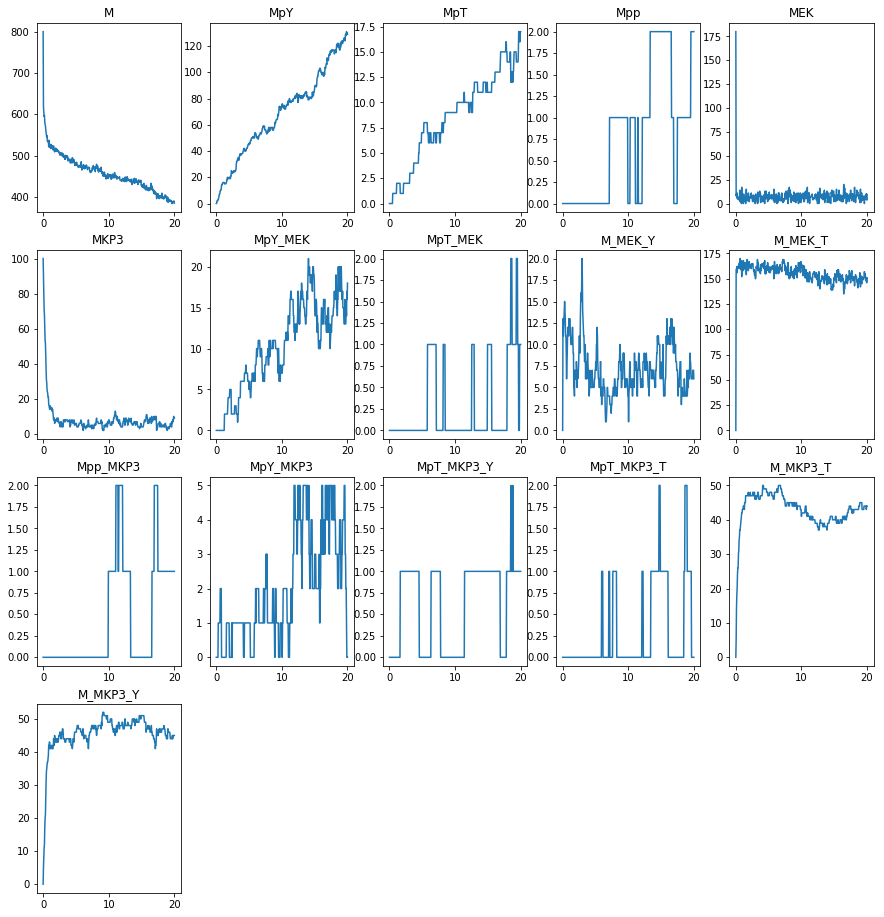

In [13]:
ns = len(stoch_model.listOfSpecies)
plt.figure(figsize=(15,4*int(math.ceil(ns/5.0))))
for n,s in enumerate(stoch_model.listOfSpecies):
    plt.subplot(int(math.ceil(ns/5.0)),5,n+1)
    plt.plot(sresults[0][:,0],sresults[0][:,n+1])
    plt.title(s)